In [3]:
import pandas as pd
from EDA.DataReader import DataReader
from matplotlib import pyplot as plt

In [4]:
# Read file
dataReader = DataReader("")

In [5]:
df_train = dataReader.df_train
df_test = dataReader.df_test
df_total = dataReader.df_total

In [6]:
# length of data
len_train = len(df_train)
len_test = len(df_test)
len_total = len(df_total)
print(len_total)
# % of each data
print(f'% data train: {round(len_train / len_total * 100, 2)}')
print(f'% data test: {round(len_test / len_total * 100, 2)}')

38278
% data train: 80.0
% data test: 20.0


In [7]:
# Min, Max and average number of words in sentence
num_of_word = 0
min_now = 1000000
max_now = 0
for sentence in df_total["corpus"]:
    words = len(sentence.split())
    num_of_word += words
    max_now = max(max_now, words)
    min_now = min(min_now, words)
print(f'max word in sentence: {max_now}')
print(f'min word in sentence: {min_now}')
print(f'average number of word in sentence: {round(num_of_word / len_total)}')

max word in sentence: 1336
min word in sentence: 4
average number of word in sentence: 80


In [8]:
def find_vocab(corpus: list)-> list:
    voc = set()
    for sent in corpus:
        for w in sent.split():
            if not w.isdigit():
                voc.add(w)
    return list(voc)

In [9]:
# number of vocabulary
vocab_total = find_vocab(df_total["corpus"])
vocab_train = find_vocab(df_train["corpus"])
vocab_test = find_vocab(df_test["corpus"])
print(f'vocab total size: {len(vocab_total)}')
print(f'vocab train size: {len(vocab_train)}')
print(f'vocab test size: {len(vocab_test)}')

vocab total size: 106741
vocab train size: 91127
vocab test size: 35203


In [10]:
# count label in each dataset
label_series = pd.Series({
    0: "negative",
    1: "positive"
})
count_label_train = df_train["label"].value_counts()
count_label_total = df_total["label"].value_counts()
count_label_test = df_test["label"].value_counts()
df_label_train = pd.concat([label_series, count_label_train], axis=1, keys=["label", "count"])
df_label_total = pd.concat([label_series, count_label_total], axis=1, keys=["label", "count"])
df_label_test = pd.concat([label_series, count_label_test], axis=1, keys=["label", "count"])
print(f'dataframe of train dataset:')
print(df_label_train)
print(f'dataframe of dev dataset:')
print(df_label_test)
print(f'dataframe of total dataset:')
print(df_label_total)

dataframe of train dataset:
      label  count
0  negative  15246
1  positive  15376
dataframe of dev dataset:
      label  count
0  negative   3866
1  positive   3790
dataframe of total dataset:
      label  count
0  negative  19112
1  positive  19166


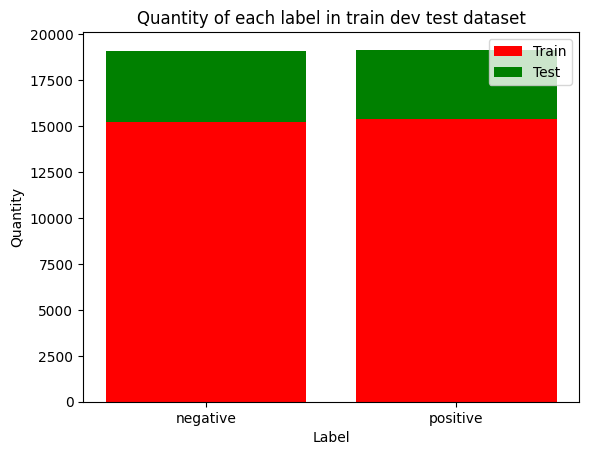

In [11]:
# plot value in stacked bar chart
plt.bar(df_label_train["label"], df_label_train["count"], color="red")
plt.bar(df_label_test["label"], df_label_test["count"], bottom=df_label_train["count"], color="green")
plt.xlabel("Label")
plt.ylabel("Quantity")
plt.legend(["Train", "Test"])
plt.title("Quantity of each label in train dev test dataset")
plt.show()